<a href="https://colab.research.google.com/github/Drhonghanchen/colab_misc/blob/main/obj_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import torch
from google.colab import drive
import torchvision.datasets as datasets
import numpy as np
import torchvision.transforms.functional as F
import torchvision.transforms as T 
import torchvision.models as models
import torchvision.utils as vutils

from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cocopath = '/content/drive/MyDrive/coco2017/val2017'
cocoannopath = '/content/drive/MyDrive/cocoanno2017/annotations/instances_val2017.json'

In [5]:
coco_data = datasets.CocoDetection(cocopath,cocoannopath,transform=None)
print(coco_data)

loading annotations into memory...
Done (t=1.48s)
creating index...
index created!
Dataset CocoDetection
    Number of datapoints: 5000
    Root location: /content/drive/MyDrive/coco2017/val2017


In [13]:
(image,target) = coco_data[5]
test_transform = T.Compose(
    [T.ToTensor()]
)
input_tensor= test_transform(image)
input_batch=input_tensor.unsqueeze(0)

objdet_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
objdet_model = objdet_model.eval()
outputs = objdet_model(input_batch)
#print(outputs)

In [7]:
plt.rcParams["savefig.bbox"] = 'tight'
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

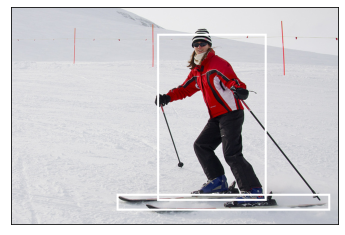

In [14]:
thresh=0.9
img_tensor_int = (T.ToTensor()(image)*255).type(torch.uint8)
image_with_boxes =vutils.draw_bounding_boxes(img_tensor_int,boxes=outputs[0]['boxes'][outputs[0]['scores']>thresh],width=4)
show(image_with_boxes)